<a href="https://colab.research.google.com/github/aws3ma/traitement-image-video/blob/main/TP2_TRAIT_IMAGE_2IDSD_enonc%C3%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP2 ANALYSE D'HISTOGRAMMES 
                                                                                                 Nom: Oussema
                                                                                                 Prenom: Trabelsi
                                                                                                 Groupe: 2 IDSD 2 Groupe 2

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
trait_img_vid_folder='/content/drive/MyDrive/trait_img_vid/'

Mounted at /content/drive


## Introduction
Afficher une image n'est pas suffisant pour analyser son contenu. Pour extraire de l'information à partir de l’image, nous utilisons des outils d'aide à l'analyse tels que l’histogramme, le profil, le scanning. Dans ce TP, nous mettons l'accent sur l'histogramme dont l’usage est très répondu.


## I. Illustration sur une image synthétique
### 1. Histogramme
En statistiques, un histogramme est un graphique permettant de représenter la répartition d'une variable continue. Spécifiquement, en imagerie numérique, il permet de représenter la distribution des intensités de l'image c'est-à-dire le nombre de pixels (en ordonnée) pour chaque intensité lumineuse (en abscisse en allant du plus foncé au plus clair). A titre d'exemple, l’histogramme d’une image en 256 niveaux de gris comporte 256 valeurs en abscisses et le nombre de pixels de l'image en ordonnées.
* Génerer et afficher l'image **'im'** qui prend comme matrice: 

\begin{array}{ccc} 
1 & 1 & 0 & 0 \\
2 & 2 & 1 & 1 \\
0 & 3 & 2 & 2 \\
1 & 1 & 1 & 1 \end{array} 

* Calculer l'histogramme **H** de l'image **imv.
* Afficher l’histogramme de l’image (utiliser la fonction **bar**).

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


<BarContainer object of 4 artists>

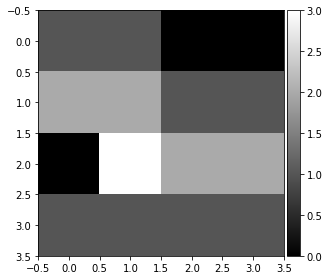

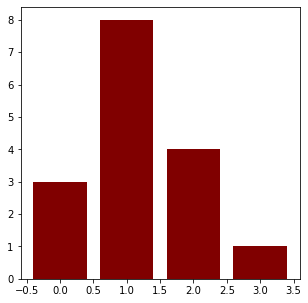

In [ ]:
import skimage.io as io
import numpy as np
import matplotlib.pyplot as plt
import collections
im = np.array([[1,1,0,0],[2,2,1,1],[0,3,2,2],[1,1,1,1]],dtype='uint8')
io.imshow(im,cmap="gray")
vo={}
for i in range(im.shape[0]):
  for j in range(im.shape[1]):
    if(im[i,j] in vo.keys()):
      vo[im[i,j]] += 1
    else:
      vo[im[i,j]] = 1
keys = vo.keys()
values = vo.values()

fig = plt.figure(figsize = (5, 5))
plt.bar(keys, values, color ='maroon',width = 0.8)

### 2. Histogramme cumulé
L'histogramme cumulé est un graphique qui représente le pourcentage de pixels noté $ HC(x_{k})$ (voir l’équation ci-dessous) de valeurs inférieures à un niveau d'intensité donné $x_{k}$. Il donne idée sur l'équilibre de la répartition des niveaux de couleurs, voir notamment si la pleine échelle des niveaux de couleur est utilisée.
où $H$ désigne le nombre de pixels d’intensité égale à $x_{j}$, $n$ et $m$ sont les dimensions de l’image en ligne et colonne.
$$ HC(x_{k})=\frac{\sum_{j=0}^{+k} H(x_{j})}{n*m} $$
* Reprenons le programme précédent:

In [ ]:
#trie la dictionnaire
od=collections.OrderedDict(sorted(vo.items()))
values = list(od.values())
keys = list(od.keys())
keys

[0, 1, 2, 3]

[0.1875 0.6875 0.9375 1.    ]


<BarContainer object of 4 artists>

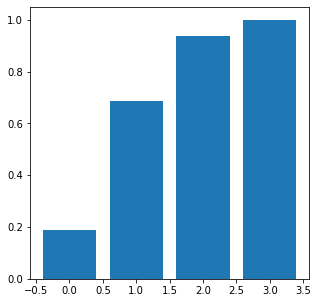

In [ ]:
#calcul de l’histogramme cumulé
HC=np.zeros(shape=4,dtype=np.uint8)
HC[0]=values[0]
#print(H)
for i in range(1, 4):
    HC[i]=HC[i-1]+values[i]
HC=HC/(im.shape[0]*im.shape[1])
print(HC) 
# afficher l’histogramme cumulé (fig)
fig1 = plt.figure(figsize=(5,5))
plt.bar(keys,HC)

## II. Illustration sur un cas réel
#### 1. Histogramme d’une image en couleurs
Considérer l’image couleur "**lena.bmp**".
*  Convertir l’image en niveaux de gris.
*  Redimensionner l’image à 100 x 100.
*  Calculer et afficher l’histogramme de l’image (utiliser les fonctions **np.histogram**,**bar**).
*  Calculer et afficher l’histogramme cumulé.(utiliser les fonctions **np.cumsum,bar**).

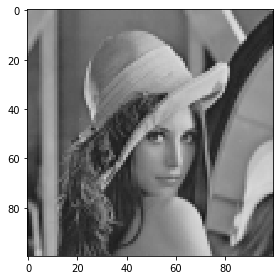

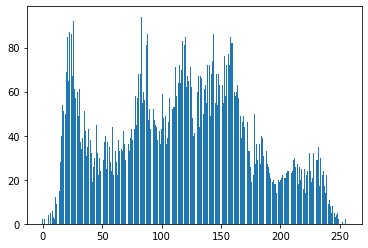

<function matplotlib.pyplot.show(*args, **kw)>

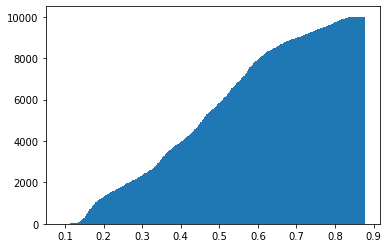

In [ ]:
from ctypes import sizeof
from skimage import io
from skimage.color import rgb2gray
from skimage.transform import resize
lena = io.imread(trait_img_vid_folder+'/TP2/lena.bmp')
io.imshow(lena)
gray_lena = rgb2gray(lena)
io.imshow(gray_lena,cmap="gray")
resized_lena = resize(gray_lena,(100,100),anti_aliasing=True)
io.imshow(resized_lena,cmap="gray")

fig3 = plt.figure()
hist1,hist2=np.histogram(resized_lena,bins=256)
plt.bar(np.arange(256),hist1)
plt.show()
plt.hist(resized_lena.ravel(),bins=255,cumulative =True)
plt.show

#### 2. Histogramme d’une image en couleurs
On considère maintenant l’image de chat **"chelsea"** en couleurs.
* Calculer l'histogramme correspondant pour chaque composante rouge, verte et bleue de l'image chelsea. (utiliser la fonction **exposure.histogram**)
* Afficher dans le même graphique les trois histogrammes calculés dans la deuxième question. 
* Interpréter les résultas obtenus.

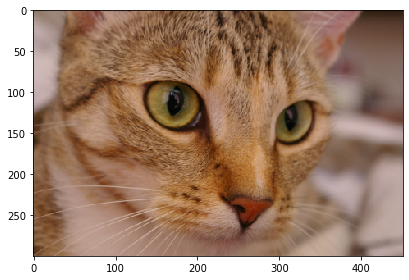

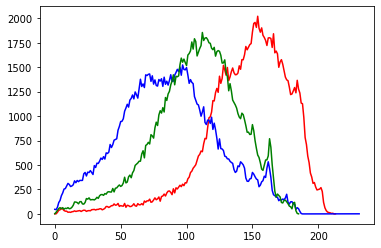

In [ ]:
from skimage import data,exposure
chelsea = data.chelsea()
io.imshow(chelsea)
red,green,blue=chelsea[:,:,0],chelsea[:,:,1],chelsea[:,:,2]

fig4 = plt.figure()
plt.plot(exposure.histogram(red)[0],color="red")
plt.plot(exposure.histogram(blue)[0],color="blue")
plt.plot(exposure.histogram(green)[0],color="green")

## III. Modification de l’histogramme
Dans le cas où l’image traitée est surexposée (uniformément blanche) ou sous-exposée (uniformément noire), il est utile d'ajuster son contraste et l'échelle des couleurs pour mieux l’analyser. Ceci revient à modifier son histogramme sans pour autant altérer ses informations. Parmi les méthodes de modification de l’histogramme, nous citons le seuillage, l'étirement, l'égalisation et l'inversion.
#### 1. Seuillage
Le seuillage est l'opération qui, étant donnée une certaine valeur appelée seuil, met à zéros les pixels d'intensité inférieure au seuil et à 1 (ou 255) les pixels d'intensité supérieure au seuil. Le résultat est une image binaire. Le but du seuillage est de faire apparaître des formes ou des objets dans l'image. Cependant, sa principale difficulté est le choix et l'ajustement du seuil. 
Notons également qu'il est possible de considérer deux seuils. Ainsi, les pixels d'intensités
comprises entre ces deux seuils sont mis à 1 (ou 255) et les autres à 0. Ce seuillage est dit
passe-bande.
#### 2. Binarisation par seuillage Otsu
La méthode de seuillage Otsu permet d’obtenir une image binaire telle que les pixels ayant une valeur inférieure à un certain seuil prennent la valeur 0 et ceux qui présentent des valeurs supérieures à ce seuil prennent la valeur 1. Ce seul peut être déterminé en utilisant la commande ‘threshold_otsu’.
* Calculer la valeur du seuil de l’image Camera pour la méthode Otsu. Utiliser la commande **'threshold_otsu’**.
*  Calculer l’histogramme de l’image étudiée et l’afficher. 
* Superposer une droite verticale en couleur rouge indiquant la valeur du seuil (calculé dans la question 1) sur l’histogramme (de la question 2). Utiliser les commandes **‘axvline’** et **‘color’**. 
* Calculer et afficher l’image binaire résultante en appliquant la méthode par seuillage Otsu.


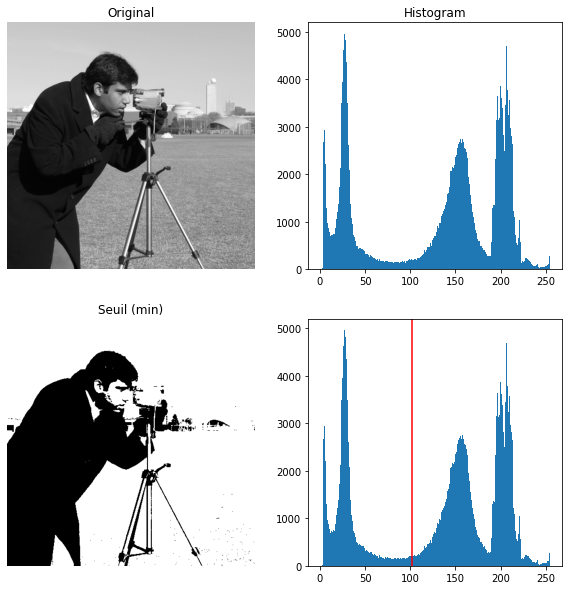

In [ ]:
from skimage.filters import threshold_otsu
cam = data.camera()
seuil = threshold_otsu(cam)
binary = cam > seuil
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].imshow(cam, cmap=plt.cm.gray)
ax[0, 0].set_title('Original')

ax[0, 1].hist(cam.ravel(), bins=256)
ax[0, 1].set_title('Histogram')

ax[1, 0].imshow(binary, cmap=plt.cm.gray)
ax[1, 0].set_title('Seuil (min)')

ax[1, 1].hist(cam.ravel(), bins=256)
ax[1, 1].axvline(seuil, color='r')

for a in ax[:, 0]:
    a.axis('off')
plt.show()

#### 3. Etirement de l’histogramme
Cette technique est utilisé lorsque l’image est trop claire, trop foncée ou peu contrastée (On appelle dynamique : l'intervalle $[a,b]$ Où a et b sont respectivement les niveaux de gris minimal et maximal présents dans l’image.

La dynamique maximale est répresenté par $[0,255]$. Par conséquence, le but du recadrage dynamique est de redistribuer les niveaux de gris de l’image pour qu’ils occupent toute la bande de nuances possible, c.-à-d. la dynamique maximale.
 
Cette opération consiste à répartir les fréquences d'apparition des pixels sur la largeur de
l'histogramme afin d'augmenter le contraste d'une image. Ceci revient à étendre l'histogramme
de manière que la valeur d'intensité la plus faible soit à zéro et la plus haute soit à la valeur
maximale.
Mathématiquement, l’étirement est une transformation linéaire $T$ qui s’applique sur les
valeurs $x$ des pixels de l’image. Ainsi,


$x \in\left[ x_{min}, x_{max} \right]  T(x)=g*x+d$
avec $d$ et $g$ deux constantes.

Considérer l’image couleur **"image_sombre.jpeg"**.
* lire et afficher l'image sombre au niveau de gris.
* Afficher les valeurs $x_{min}$ et $x_{max}$ de l’image.
* Calculer les valeurs $g,d$ sachant que 
$$g=\frac{255}{x_{max}-x_{min}}$$
$$d=\frac{x_{min}*255}{x_{max}-x_{min}}$$
* Etirer l’histogramme de l’image.
* Afficher  l’histogramme de l’image originale et l’image modifiée.
* Enregistrer l’image modifiée.

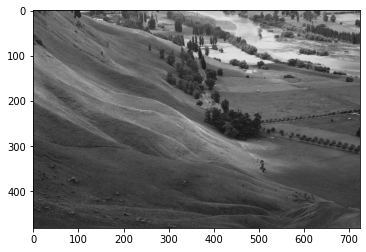

<BarContainer object of 256 artists>

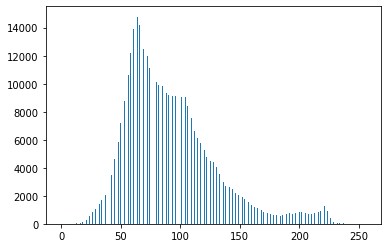

In [ ]:
sombre = io.imread(trait_img_vid_folder+'/TP2/image_sombre.jpeg')


g0=255/(sombre[:,:,0].max()-sombre[:,:,0].min())
g1=255/(sombre[:,:,1].max()-sombre[:,:,1].min())
g2=255/(sombre[:,:,2].max()-sombre[:,:,2].min())


d0=(sombre[:,:,0].min()*255)/(sombre[:,:,0].max()-sombre[:,:,0].min())
d1=(sombre[:,:,1].min()*255)/(sombre[:,:,1].max()-sombre[:,:,1].min())
d2=(sombre[:,:,2].min()*255)/(sombre[:,:,2].max()-sombre[:,:,2].min())

b1=sombre[:,:,0]*g0+d0
b2=sombre[:,:,1]*g1+d1
b3=sombre[:,:,2]*g2+d2

etirer=b1+b2+b3

plt.imshow(etirer,cmap="gray")
plt.show()
H,bins=np.histogram(etirer,bins=256)
plt.bar(np.arange(0,256),H)